<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

This section for bouns, you might need to use some basic Machine Learning algorithms to answer some questions that in cases of regression, and classification. In this scope of this subject, highly recommend you use `scikit-learn` (instead of implement once again these algorithms)

**YOUR ANSWER HERE**

**Question:** Predict `Life expectancy`.

**Answering this question will:** help some countries in planning healthcare, insurance, social welfare, and economic policy. Support resource allocation, retirement planning, informs research, and encourages healthier lifestyles.

**How we answer this question:** Build a linear regression to predict the `Life expectancy` from some of given features in our data.

## Import

In [1]:
# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

## Data preparation

We will use the processed data at the previous stage since all missing values have been replaced, columns with too many missing values have been removed. This will be helpful for our next steps.

In [2]:
# YOUR CODE HERE (OPTION) 
df = pd.read_csv("../data/processed/21127240_asia_processed.csv")
df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,41128771.0,20362329.0,20766442.0,20.700378,6.343087,9.0,21.36864,28.950359,31.756573,12.92565,...,3671.529455,20.82783,78.362752,68.719252,74.080759,101.511461,33.217823,93.345172,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842000,7.344000,9.0,21.36864,28.950359,31.756573,12.92565,...,3671.529455,17.86000,78.362752,58.915000,65.279000,101.511461,33.217823,93.345172,2021,Afghanistan
2,38972230.0,19279929.0,19692301.0,36.051000,7.113000,9.0,18.48131,45.983410,53.913680,26.41834,...,3671.529455,17.58000,78.362752,59.866000,65.432000,101.511461,10.858440,93.345172,2020,Afghanistan
3,37769499.0,18679090.0,19090409.0,36.466000,6.791000,9.0,18.33941,44.512630,59.361470,24.07933,...,3671.529455,18.51000,78.362752,60.619000,66.677000,110.007507,33.217823,86.175522,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927000,6.981000,9.0,18.12015,44.397120,63.669470,23.55313,...,3671.529455,17.96000,78.362752,59.923000,66.458000,107.780533,9.963790,88.735519,2018,Afghanistan


## Feature engineering

First, we will calculate the feature: `Life expectancy` = (`Male life expectancy` + `Female life expectancy`) / 2. Then these two features can be removed.

In [3]:
df['Life expectancy'] = (df['Male life expectancy'] + df['Female life expectancy ']) / 2
df.drop(inplace=True, columns=['Male life expectancy', 'Female life expectancy '])

__Correlation analysis__

Calculate the correlation matrix to get all correlations between each pair of features: to consider dropping some features that correlate too weakly with the `Life expectancy` or correlate too much with other features.

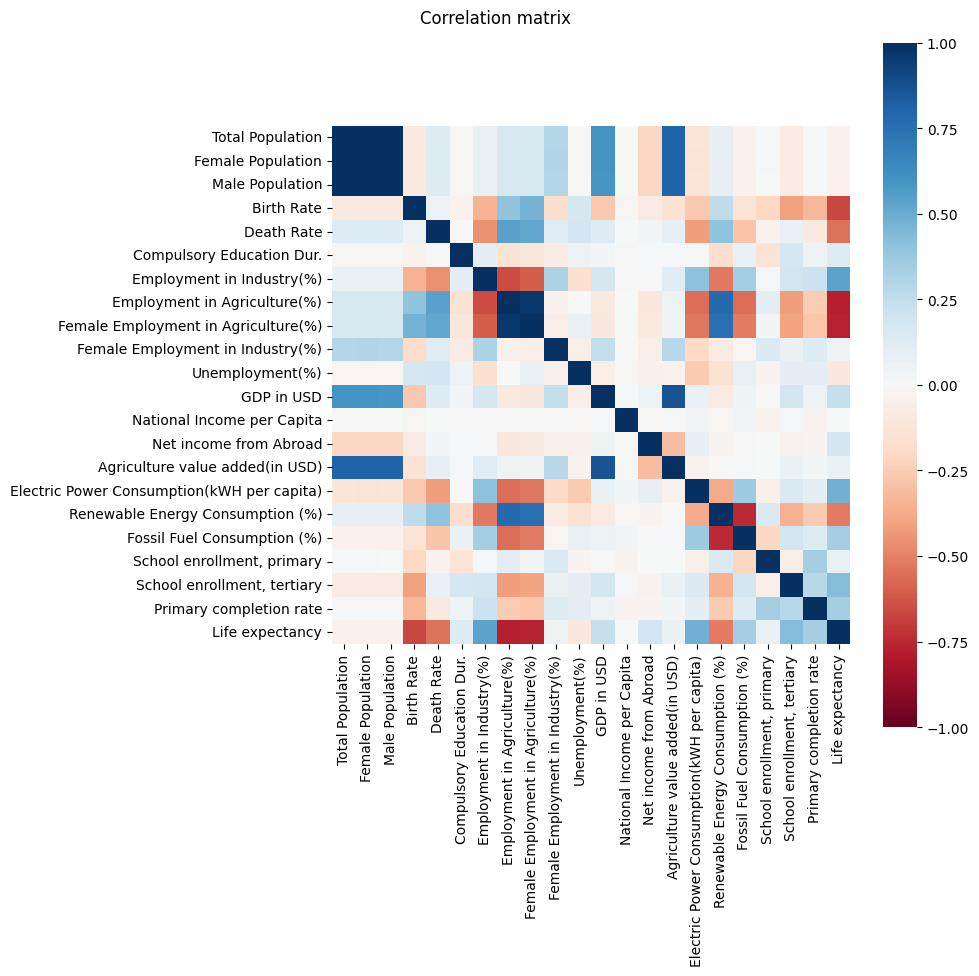

In [4]:
# create a copy
df_copy = df.copy()

# Exclude the categorical features from the matrix
tmp_1 = df_copy.drop(['Year', 'Country'], inplace=False, axis='columns')

# get correlation matrix
tmp_1 = tmp_1.corr()

# YOUR CODE HERE
# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle("Correlation matrix")
sns.heatmap(tmp_1, cmap='RdBu', center=0,ax=ax, vmin=-1, vmax=1, square=True)
fig.tight_layout()

There's some features that's not neccessary or can be easily calculated by other features, we can remove these features from our data to avoid noise. These features includes: `Male Population`, `Female Population`, `Female Employment in Agriculture(%)`, `Female Employment in Industry(%)`...

Some features that are correlate too weakly can also be removed: `School enrollment, primary`, 

`Country` will also be removed, but not for `Year` since it can be converted to integer number. Moreover, `Year` also plays an pretty important role in the model since the year reflected how modern the world is. For some reasons: the more modern the world, the higher the average life expectancy due to many reasons.

In [5]:
df.drop(inplace=True, columns=['Male Population', 
                               'Female Population',
                               'Female Employment in Agriculture(%)', 
                               'Female Employment in Industry(%)',
                               'School enrollment, primary',
                               'Country'])

In [6]:
# YOUR CODE HERE (OPTION) 

# calculate Life expectancy = (Male life expectancy + Female life expectancy) / 2
X = df.drop(columns='Life expectancy') # all columns except the label
y = df['Life expectancy']  # Replace with the actual column name

## Training model

First, I'll split the data into 3 datasets: train/test/validation with the proportion of 60/20/20

In [7]:
# YOUR CODE HERE (OPTION)
SHUFFLE_SEED = 240

# split the first time to have: train/test+validation of 60/40
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, 
                                                                test_size=0.4, random_state=SHUFFLE_SEED)

# split the second time to get: test/validation of 50/50 = 20/20
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid, 
                                                    test_size=0.5, random_state=SHUFFLE_SEED)

Start building and training the linear regression model 

In [8]:
# Create a linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

LinearRegression()

## Evaluation

Use the test set for evaluating with cross-validation. Using k-fold cross-validation, the number of folds I'll use in this case will be 10, the larger number of folds is the less bias occur in the evaluation process but the computational cost may increase.

In [9]:
# YOUR CODE HERE (OPTION) 

# k in k-folds
NUM_FOLDS = 10

# 10-fold cross-validation using the test set for training
cv_scores = cross_val_score(linear_model, X_test, y_test, cv=NUM_FOLDS, scoring='neg_mean_squared_error')

# convert into positive value since the function return the negated value of the metric 
mse_scores = -cv_scores 

# R-squared scores
r2_scores = cross_val_score(linear_model, X_test, y_test, cv=NUM_FOLDS, scoring='r2')

# take the mean value for all folds
cv_mse_score = mse_scores.mean()
cv_r2_score = r2_scores.mean()

print(f"Cross-Validation Mean MSE: {cv_mse_score}")
print(f"Cross-Validation Mean R-squared: {cv_r2_score}")

Cross-Validation Mean MSE: 4.899136043586887
Cross-Validation Mean R-squared: 0.8377451947651536


The above results suggest that the linear regression model is effective in predicting `life expectancy` and that it generalizes well across different subsets of the data. It can be used with confidence for predicting `life expectancy` in various scenarios.

So let's continue to next step: __Prediction__

## Prediction

Predict on validation set to see how the model will perform on another test set.

In [10]:
# YOUR CODE HERE (OPTION) 
y_valid_pred = linear_model.predict(X_valid)

## Results analysis

In [11]:
# YOUR CODE HERE (OPTION) 
# use MSE and R-squared to see how the model performed
mse_valid = mean_squared_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)
print(f"Prediction MSE: {mse_valid}")
print(f"Prediction R-squared: {r2_valid}")

Prediction MSE: 4.686966213726485
Prediction R-squared: 0.8693108510285478


Using scatter plot to visualize how the model performed

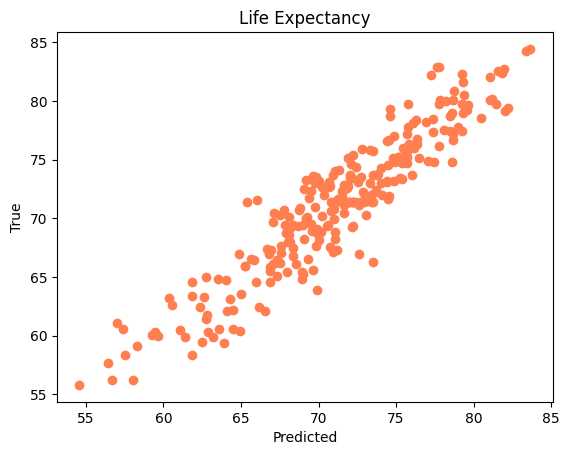

In [12]:
plt.scatter(y_valid_pred, y_valid, c='coral')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Life Expectancy")
plt.show()

Build a confusion matrix to see the result easier.

Note that the values of the feature `Life expectancy` are floating point numbers. Therefore, we should round and group the those values into different age categories in order to create a confusion matrix more easily.

In [13]:
# round the age in to groups of age: <50, 50-55, 55-60,,... 80-85, >85

labels = [i for i in range(50, 85 + 1, 5)]
rounded_yTrue = []
rounded_yPred = []
y_valid = list(y_valid)
y_valid_pred = list(y_valid_pred)
for i in range(len(y_valid)):
    true = False
    pred = False
    for j in range(len(labels) + 1):
        minn = float('-inf')
        maxx = float('+inf')
        if j == 0: # start
            maxx = labels[0]
        elif j == len(labels): # end
            minn = labels[-1]
        else:
            minn = labels[j - 1]
            maxx = labels[j]
        if not true and minn <= y_valid[i] < maxx:
            if j == 0:
                rounded_yTrue.append(maxx)
            else:
                rounded_yTrue.append(minn)
            true = True
        if not pred and minn <= y_valid_pred[i] < maxx:
            if j == 0:
                rounded_yPred.append(maxx)
            else:
                rounded_yPred.append(minn)
            pred = True
        if true and pred:
            break

Plot the confusion matrix

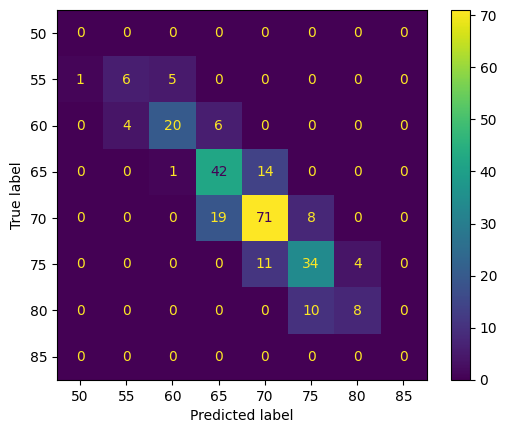

In [14]:
cm = confusion_matrix(y_true=rounded_yTrue, y_pred=rounded_yPred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

## Conclusion

**Your conclusion**

With the MSE around 4-5, it means that the model has error of 4-5 years in average, it's a relatively low error, and the model's predictions are generally close to the true values.

Moreover, the R-squared $\approx$ 0.8693, indicating that approximately 86.93% of the variance in life expectancy is explained by the selected features. This suggests that the model captures a substantial portion of the underlying relationships in the data, and it provides a reliable estimate of life expectancy.

For the scatter plot, we can see that the dots seem to form a straight line ($x \approx y$), it shows that the models' prediction is very closed to the true value, which is very good. The confusion matrix also indicates that the model correctly predict the `life expectancy` for most age groups and the deviation is not larger than 5 (smaller than MSE that we calculated above), the number of wrong predictions is also small.

In conclusion, the __linear model__'s performance is surprisingly good for predicting `life expectancy`, which is good enough for being used in practice with a high R-squared value and a relatively low MSE. However, it's important to note that the result may be not true for all cases (the train/test subsets may be changed with a different seed, the data that we received may have error...).